# 🫀 Heart Disease Prediction
_____________________________________

Let's get started!🚀
## 🔧 Import Libraries
Begin by importing essential libraries for data manipulation, visualization, and model building.


In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## 📥 Load Dataset
Loading the dataset containing patient records and heart disease information.


In [43]:
data = pd.read_csv("Heart_Disease_Dataset.csv", index_col=False)

## 🔍 Data Inspection and Exploration
We explore the dataset to understand its structure, look at sample data, and generate summary statistics.

In [44]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Exploring `dataset`. Just take a glimpse of the data using the `info()`, `desribe()`, `shape` and `columns` methods before I actually start processing and visualizing it.


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


The dataset has a total of 303 rows and there are no missing values, with total of `13 features` along with one target value which we wish to find.

In [46]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


The scale of each feature column is different and quite varied as well. While the maximum for `age` reaches 77, the maximum of `chol` (serum cholestoral) is 564.

In [47]:
data.shape

(303, 14)

The dataset has a total of `303 rows` and with total of `13 features`.
data.columns

## 🧹 Data Cleaning

Identify and handle issues such as null values, duplicates, or incorrect data formats.

In [48]:
def count_duplicate_rows(data):
    """
    Counts the number of duplicate rows in a DataFrame.

    Parameters:
    data (DataFrame): The pandas DataFrame to check for duplicates.

    Returns:
    int: The number of duplicate rows.
    """   
    duplicate_count = data.duplicated().sum()
    return duplicate_count


print(f"Number of duplicates: {count_duplicate_rows(data)}")

# Drop duplicate rows if any
data = data.drop_duplicates()

print(f"Remaining duplicates: {count_duplicate_rows(data)}")


def check_null_values(data):
    """
    Checks and prints the number of null (missing) values in each column of a DataFrame.

    Parameters:
    data (DataFrame): The pandas DataFrame to check for null values.

    Returns:
    None
    """ 
    for column in data:
        if data[column].isnull().any():
            print(f'{column} has {data[column].isnull().sum()} null values')


print("Check null values:")
check_null_values(data)

Number of duplicates: 1
Remaining duplicates: 0
Check null values:


The dataset initially contained **1 duplicate row**, which was successfully removed, leaving **0 duplicates**. After checking for missing data, **no null values** were found in any of the columns.

## 📊 Exploratory Data Analysis (EDA)

Perform an initial investigation to discover patterns, and check assumptions with the help of summary statistics and visualizations.

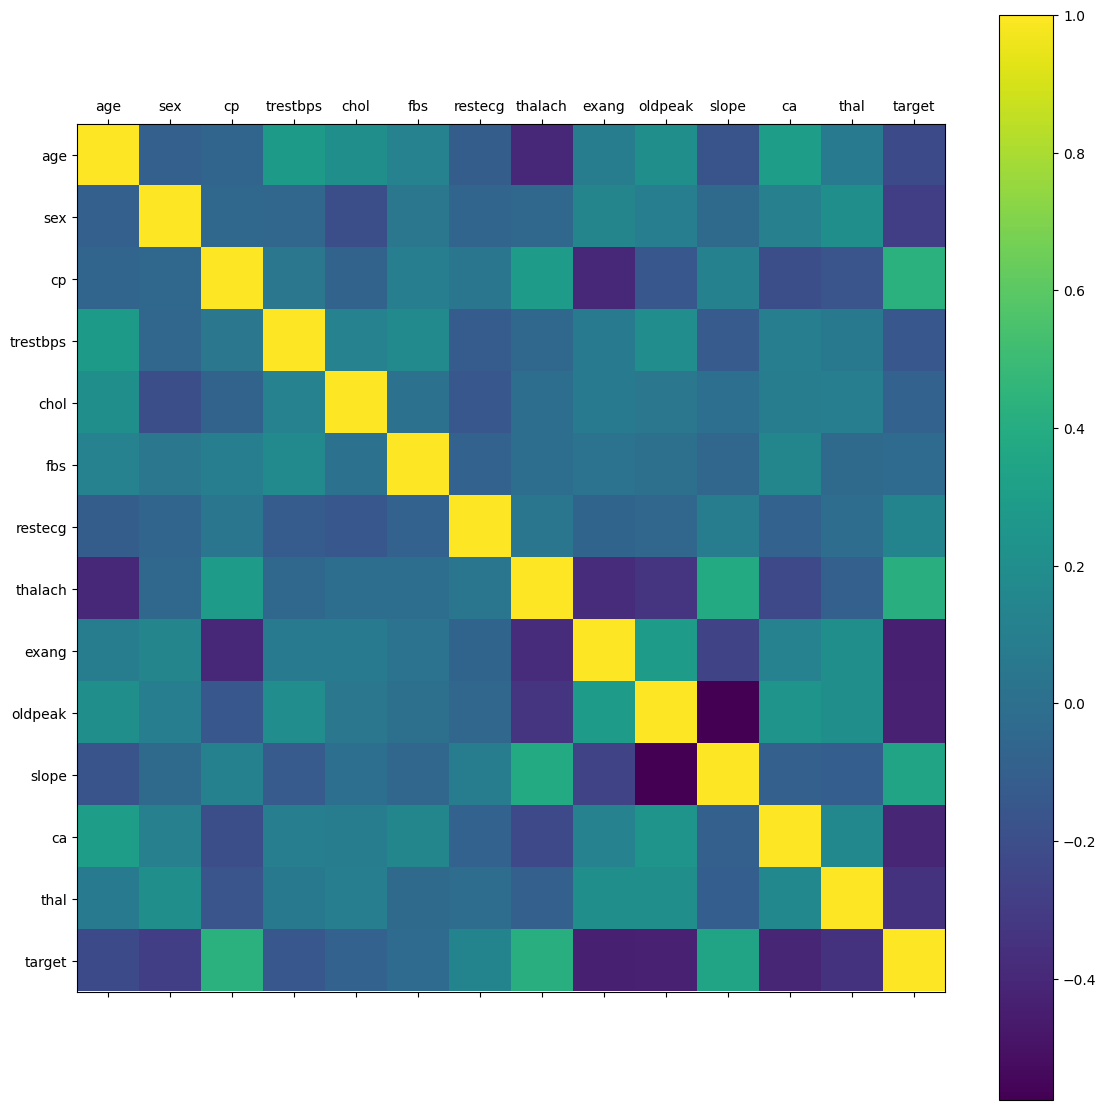

In [49]:
rcParams['figure.figsize'] = 20, 14
plt.matshow(data.corr())
plt.yticks(np.arange(data.shape[1]), data.columns)
plt.xticks(np.arange(data.shape[1]), data.columns)
plt.colorbar()

Taking a look at the correlation matrix above, it's easy to see that a few features have negative correlation with the target value while some have positive.


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

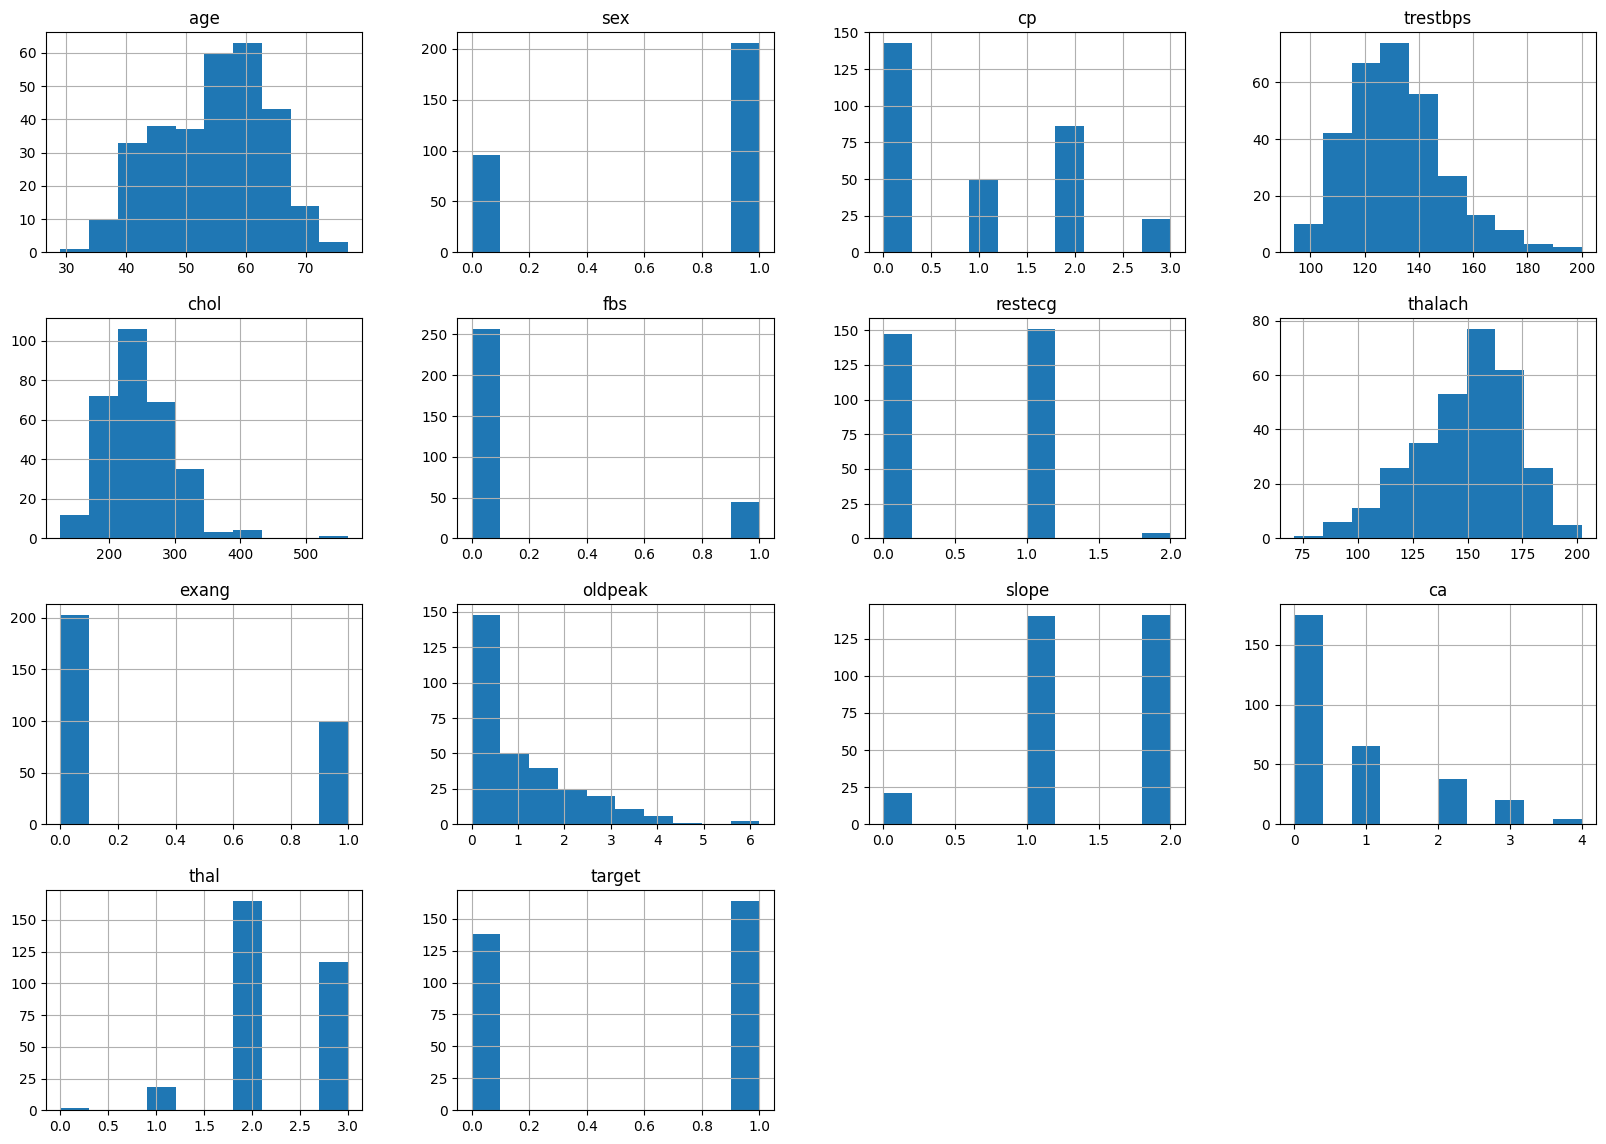

In [50]:
data.hist()

Taking a look at the histograms above, I can see that each feature has a different range of distribution. Thus, using scaling before our predictions should be of great use. And, the categorical features has stood out.


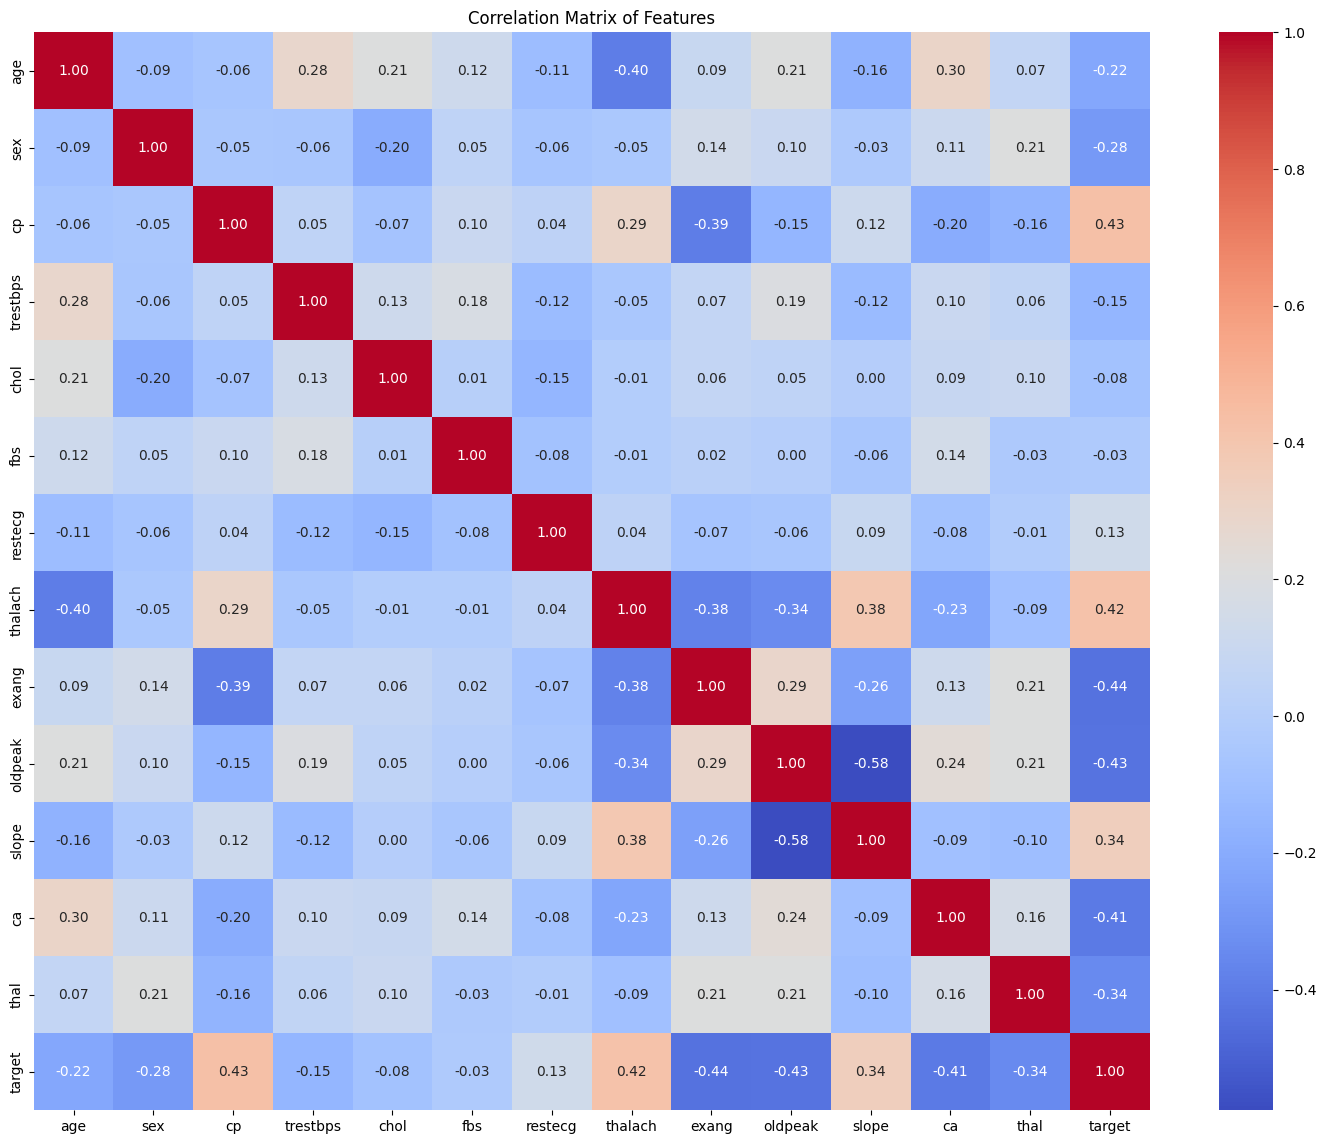

In [51]:
plt.figure(figsize=(18, 14))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

The heatmap below visualizes the **pairwise correlation coefficients** between the numerical features in the dataset. Strong positive correlations are shown in shades of red, while strong negative correlations are shown in shades of blue, based on the `coolwarm` colormap. 

Annotated values indicate the **strength and direction of relationships** between features, helping to identify potential multicollinearity or strong predictors for modeling.


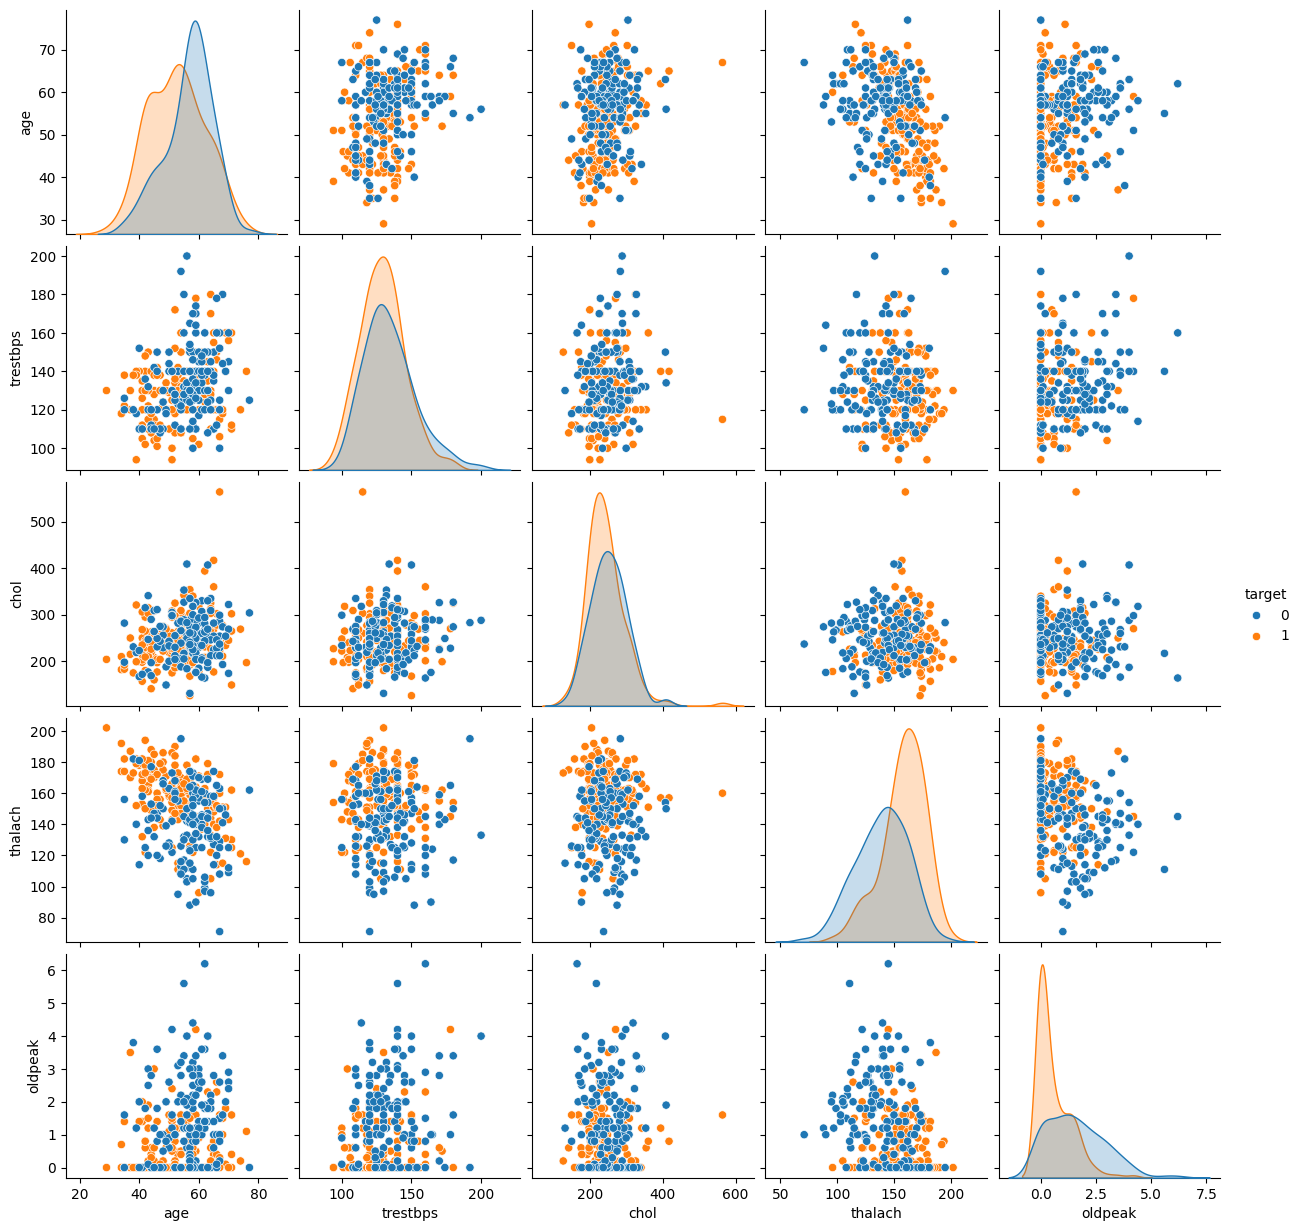

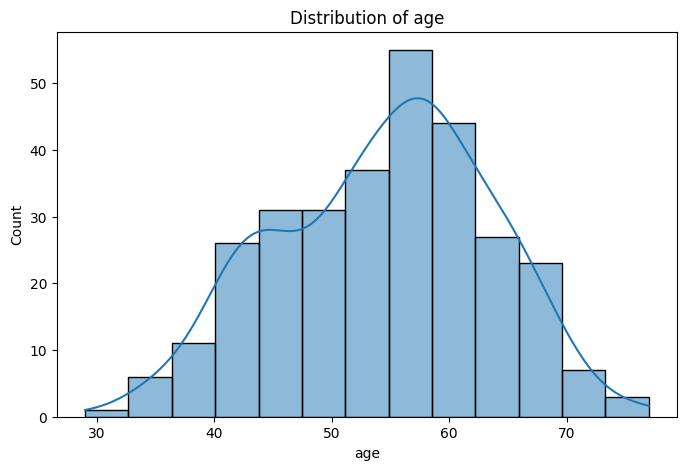

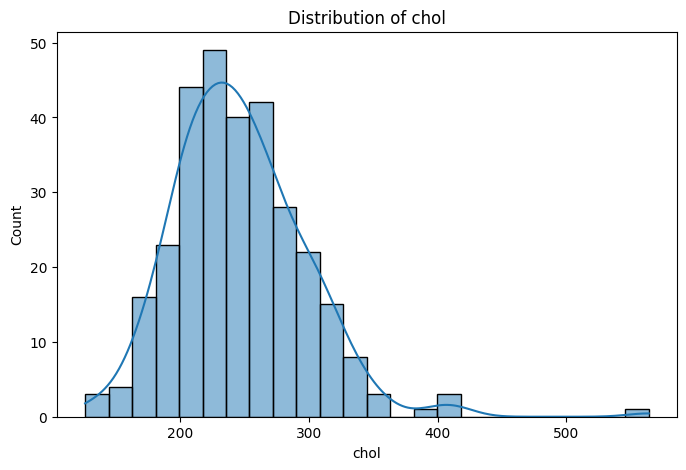

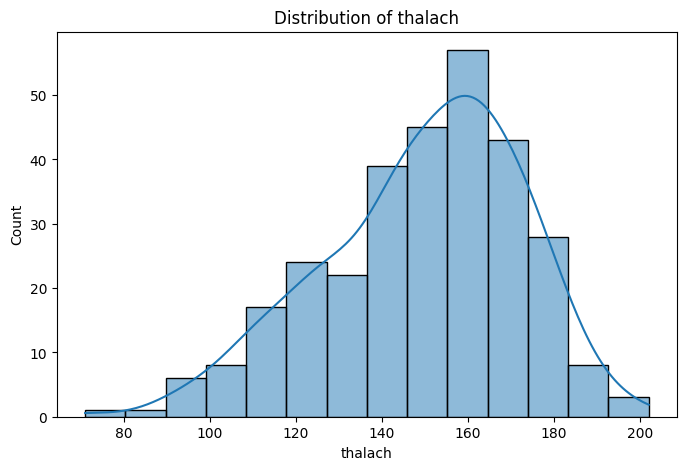

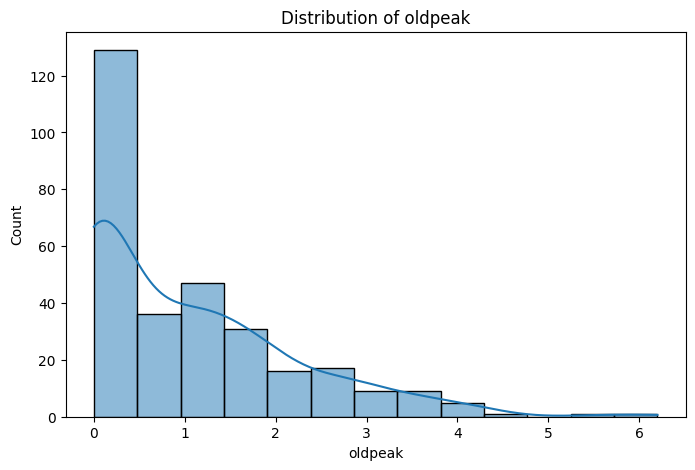

In [52]:
selected_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']
sns.pairplot(data[selected_cols], hue='target')
plt.show()
for col in ['age', 'chol', 'thalach', 'oldpeak']:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

Now let's check the approximate of equal size from out target classes.

Text(0.5, 1.0, 'Count of each Target Class')

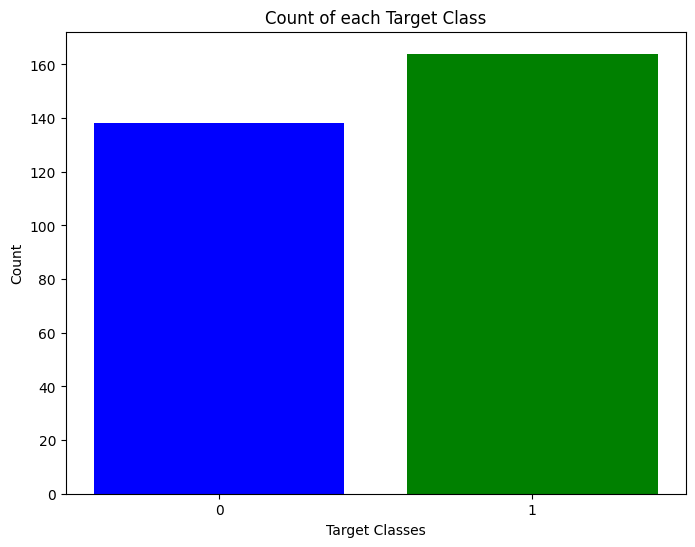

In [53]:
rcParams['figure.figsize'] = 8, 6
plt.bar(data['target'].unique(), data['target'].value_counts(), color = ['green', 'blue'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

The two classes are not exactly 50% each but the ratio is good enough to continue without dropping/increasing our data.


## 📊 Data Preprocessing
After exploring the dataset, observed convertions of some categorical variables into dummy variables and scale need to be made using `get_dummies` method, before training the models.


In [54]:
data = pd.get_dummies(data, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

Now, let's standerdise the data using `StandardScaler` from `sklearn` to scale my dataset.

In [55]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data[columns_to_scale] = standardScaler.fit_transform(data[columns_to_scale])

## 🤖 Model Development

Build and train machine learning models using the preprocessed dataset. This involves selecting appropriate algorithms, splitting the data into training and test sets, fitting the models, and preparing them for evaluation.

In [56]:
y = data['target']
X = data.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33 , random_state = 0)

#### K Neigbors Classifier

In [57]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

Plot a score graph for different values of K (Neighbors) to check the best score achieved .

The score for K Neighbors Classifier is 83.0% with 3, 14, and 16 nieghbors.


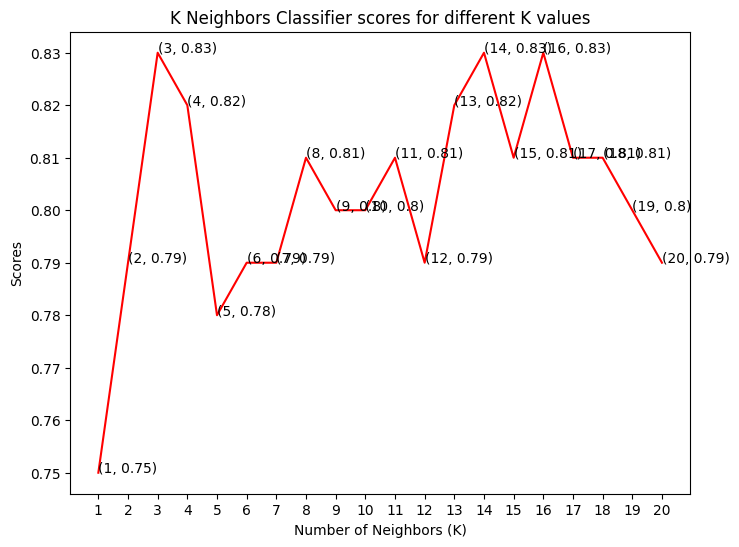

In [58]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')
print("The score for K Neighbors Classifier is {}% with {}, {}, and {} nieghbors.".format(knn_scores[2]*100, 3, 14, 16))

In [59]:
print("The score for K Neighbors Classifier is {}% with {}, {}, and {} nieghbors.".format(knn_scores[2]*100, 3, 14, 16))

The score for K Neighbors Classifier is 83.0% with 3, 14, and 16 nieghbors.


#### Support Vector Classifier

In [60]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))

Plot a bar plot of scores for each kernel(s) and see which performed the best.

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

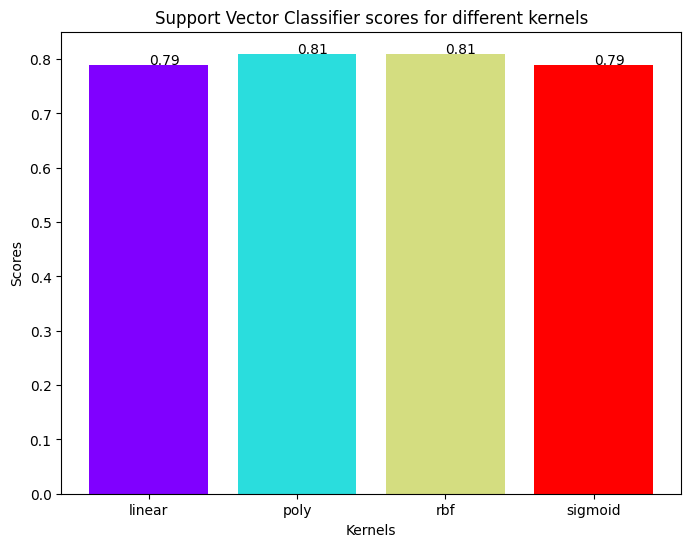

In [61]:
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

In [62]:
print("The score for Support Vector Classifier is {}% with {}, and {} kernel.".format(svc_scores[1]*100, 'poly', 'rbf'))

The score for Support Vector Classifier is 81.0% with poly, and rbf kernel.


#### Decision Tree Classifier
Use the Decision Tree Classifier to model the problem at hand. Varying with set of `max_features` and see which returns the best accuracy.


In [63]:
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(dt_classifier.score(X_test, y_test))

Selected the maximum number of features from 1 to 30 for split, to see the scores for each of those cases.

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

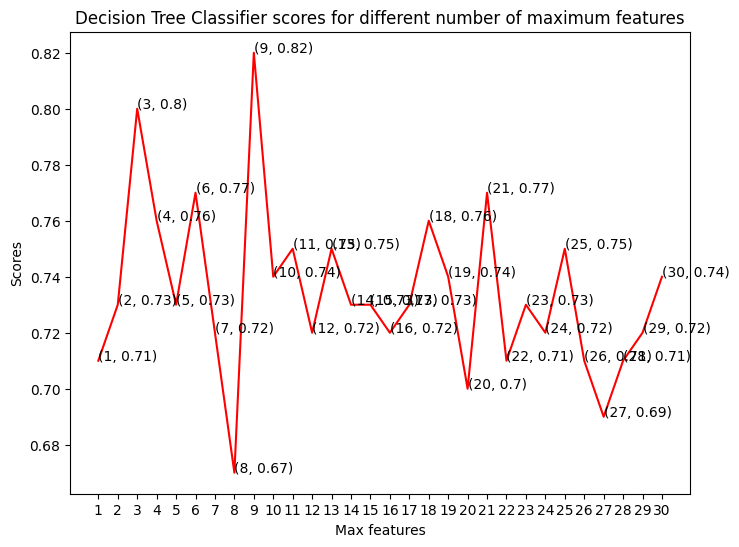

In [64]:
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'red')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

In [65]:
print("The score for Decision Tree Classifier is {}% with {} maximum features.".format(dt_scores[8]*100, 9))

The score for Decision Tree Classifier is 82.0% with 9 maximum features.


#### Random Forest Classifier

In [66]:
rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(X_train, y_train)
    rf_scores.append(rf_classifier.score(X_test, y_test))

Plot a bar plot to compare the scores recorded.

Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

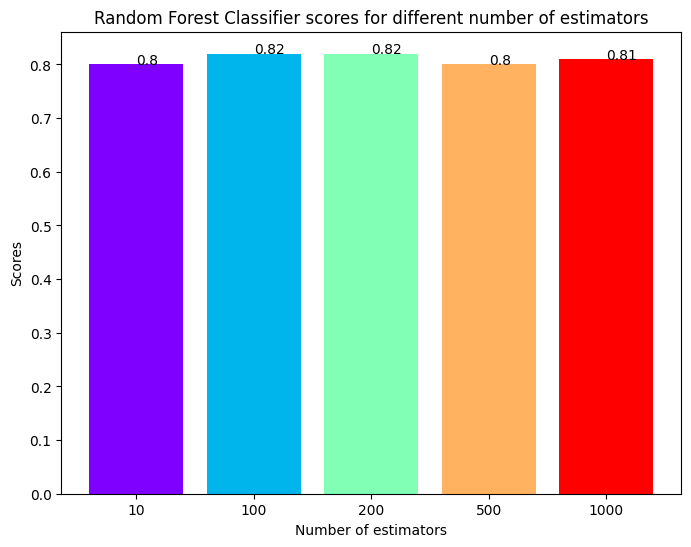

In [67]:
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], rf_scores[i])
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')

In [68]:
print("The score for Random Forest Classifier is {}% with {}, and {} estimators.".format(rf_scores[1]*100, 100, 200))

The score for Random Forest Classifier is 82.0% with 100, and 200 estimators.
